# Лаборатораня работа №4: Линейные модели, SVM и деревья решений.

## 1) Бибилиотеки, загрузка датасета, кодирование категориальных признаков

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML

df = pd.read_csv('kc_house_data.csv')

In [70]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [72]:
category_cols = ['date']
print('Количество уникальных значений\n')
for col in category_cols:
    print(f'{col}: {df[col].unique().size}')

Количество уникальных значений

date: 372


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['date'] = le.fit_transform(df[['date']])
df.head()

/home/user/summer21/disc/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


id  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520   164  221900.0         3       1.00         1180      5650   
1  6414100192   220  538000.0         3       2.25         2570      7242   
2  5631500400   290  180000.0         2       1.00          770     10000   
3  2487200875   220  604000.0         4       3.00         1960      5000   
4  1954400510   283  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [74]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## 2) Разделение выборки на обучающую и на тестовую

Для начала проведем корреляционный анализ, чтобы выявить признаки, имеющие наибольшее значение для прогнозирования успеваемости.

In [75]:
print('Признаки, имеющие максимальную по модулю корреляцию с итоговой оценкой')
best_params = df.corr()['price'].map(abs).sort_values(ascending=False)[1:]
best_params = best_params[best_params.values > 0.3]
best_params

Признаки, имеющие максимальную по модулю корреляцию с итоговой оценкой


sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
Name: price, dtype: float64

In [76]:
y = df['price']
X = df[best_params.index]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

## 3) Линейная регрессия

In [77]:
def print_metrics(y_test, y_pred):
    print(f"R^2: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [78]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print_metrics(y_test, y_pred_linear)

R^2: 0.6418969162712654
MSE: 48000800019.269455
MAE: 135783.57074277117


## 4) Полиномиальная регрессия

In [79]:
poly_model = PolynomialFeatures(degree=3)
x_train_poly = poly_model.fit_transform(x_train)
x_test_poly = poly_model.fit_transform(x_test)
linear_model = LinearRegression()
linear_model.fit(x_train_poly, y_train)
y_pred_poly = linear_model.predict(x_test_poly)
print_metrics(y_test, y_pred_poly)

R^2: 0.7281439661168174
MSE: 36440085856.2372
MAE: 116931.62527524903


## 5) SVM

In [80]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

sqft_living         grade    sqft_above  sqft_living15     bathrooms  \
count  1.512900e+04  1.512900e+04  1.512900e+04   1.512900e+04  1.512900e+04   
mean  -1.009761e-16  2.554929e-16 -5.635873e-18  -3.921629e-17  1.920894e-16   
std    1.000033e+00  1.000033e+00  1.000033e+00   1.000033e+00  1.000033e+00   
min   -1.948228e+00 -5.682429e+00 -1.809895e+00  -2.316970e+00 -2.758657e+00   
25%   -7.078339e-01 -5.594048e-01 -7.114501e-01  -7.255754e-01 -4.769120e-01   
50%   -1.746821e-01 -5.594048e-01 -2.769003e-01  -2.150454e-01  1.750150e-01   
75%    5.107989e-01  2.944325e-01  5.077034e-01   5.434562e-01  5.009785e-01   
max    1.246863e+01  4.563619e+00  9.198699e+00   6.159286e+00  7.672176e+00   

               view  sqft_basement      bedrooms           lat  
count  1.512900e+04   1.512900e+04  1.512900e+04  1.512900e+04  
mean   3.804215e-17   3.827697e-17  1.272768e-16 -3.687834e-14  
std    1.000033e+00   1.000033e+00  1.000033e+00  1.000033e+00  
min   -3.050013e-01  -6.575455e-01 -3.584677e+00 -2.913811e+00  
25%   -3.050013e-01  -6.575455e-01 -3.971504e-01 -6.497442e-01  
50%   -3.050013e-01  -6.575455e-01 -3.971504e-01  7.845587e-02  
75%   -3.050013e-01   6.071932e-01  6.653585e-01  8.514460e-01  
max    4.916345e+00   1.022824e+01  3.147812e+01  1.577479e+00

In [81]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.1), np.arange(2, 15, 1)])}
svm_model = SVR(kernel='linear')
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='r2')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 14.0}


In [85]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

R^2: 0.7325203390804943
MSE: 35853468725.62818
MAE: 103661.55678889503


## 6) Дерево решений

In [84]:
params = {'min_samples_leaf': range(3, 30)}
tree = DecisionTreeRegressor(random_state=3)
grid_cv = GridSearchCV(estimator=tree, cv=5, param_grid=params, n_jobs=-1, scoring='neg_mean_absolute_error')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'min_samples_leaf': 16}


In [86]:
best_tree = grid_cv.best_estimator_
best_tree.fit(x_train, y_train)
y_pred_tree = best_tree.predict(x_test)
print_metrics(y_test, y_pred_tree)

R^2: 0.7324417003688625
MSE: 35864009604.05768
MAE: 103713.53018165313


In [87]:
importances = pd.DataFrame(data=zip(x_train.columns, best_tree.feature_importances_), columns=['Признак', 'Важность'])
print('Важность признаков в дереве решений\n')
for row in importances.sort_values(by='Важность', ascending=False).values:
    print(f'{row[0]}: {round(row[1], 3)}')

Важность признаков в дереве решений

grade: 0.406
sqft_living: 0.288
lat: 0.212
view: 0.05
sqft_living15: 0.02
sqft_basement: 0.009
sqft_above: 0.009
bathrooms: 0.006
bedrooms: 0.001


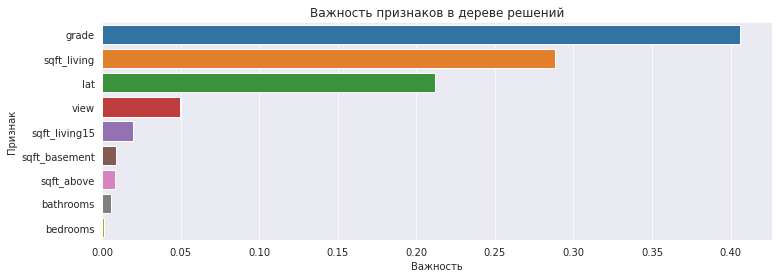

In [88]:
plt.figure(figsize=(12, 4))
sns.barplot(data=importances.sort_values(by='Важность', ascending=False), y='Признак', x='Важность', orient='h', )
plt.title('Важность признаков в дереве решений')
plt.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.304863 to fit


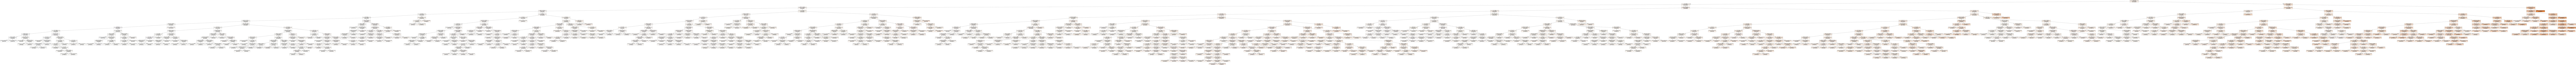

In [91]:
export_graphviz(best_tree, feature_names=best_params.index, filled=True, out_file='tree.dot')
!dot -Tpng tree.dot -o tree.png
Image(filename='tree.png')

## 7) Сравнение моделей

In [92]:
print('Линейная регрессия')
print_metrics(y_test, y_pred_linear)

print('\nПолиномиальная регрессия')
print_metrics(y_test, y_pred_poly)

print('\nМетод опорных векторов')
print_metrics(y_test, y_pred_svm)

print('\nДерево решений')
print_metrics(y_test, y_pred_tree)

Линейная регрессия
R^2: 0.6418969162712654
MSE: 48000800019.269455
MAE: 135783.57074277117

Полиномиальная регрессия
R^2: 0.7281439661168174
MSE: 36440085856.2372
MAE: 116931.62527524903

Метод опорных векторов
R^2: 0.7325203390804943
MSE: 35853468725.62818
MAE: 103661.55678889503

Дерево решений
R^2: 0.7324417003688625
MSE: 35864009604.05768
MAE: 103713.53018165313


Вывод: лучшим оказался метод опорных векторов